# UNIVERSAL Connect-4 data generator V7
Optional: mistakes deliberately made - avoid for supervised learning, keep noise to zero!!<br>
States where random agent starts are dropped

In [1]:
import numpy as np
import random
from tqdm.auto import tqdm
import time
import pandas as pd
from C4.c4_move_data_generator_refactored import *
import matplotlib.pyplot as plt

print("All dependencies imported successfully.")

All dependencies imported successfully.


In [2]:
PLAYS = {

    # random

    "L3R":   {"A": 3,  "B": "R", "games": 50},
    "L4R":   {"A": 4,  "B": "R", "games": 20},
    "L5R":   {"A": 5,  "B": "R", "games": 40},
    "L6R":   {"A": 6,  "B": "R", "games": 20},
    "L7R":   {"A": 7,  "B": "R", "games": 50},
    "L8R":   {"A": 8,  "B": "R", "games": 20},
    "L9R":   {"A": 9,  "B": "R", "games": 20},
    "L10R":  {"A": 10, "B": "R", "games": 20},
    "L11R":  {"A": 11, "B": "R", "games": 20},
    "L12R":  {"A": 12, "B": "R", "games": 20},
    "L13R":  {"A": 13, "B": "R", "games": 20},

    "RL3":   {"A": "R", "B": 3,  "games": 50},
    "RL4":   {"A": "R", "B": 4,  "games": 20},
    "RL5":   {"A": "R", "B": 5,  "games": 40},
    "RL6":   {"A": "R", "B": 6,  "games": 20},
    "RL7":   {"A": "R", "B": 7,  "games": 50},
    "RL8":   {"A": "R", "B": 8,  "games": 20},
    "RL9":   {"A": "R", "B": 9,  "games": 20},
    "RL10":  {"A": "R", "B": 10, "games": 20},
    "RL11":  {"A": "R", "B": 11, "games": 20},
    "RL12":  {"A": "R", "B": 12, "games": 20},
    "RL13":  {"A": "R", "B": 13, "games": 20},

    # LA

    "L1":   {"A": 1, "B": 1, "games": 50},
    
    "L2":   {"A": 2, "B": 2, "games": 50},
    "L2L1":   {"A": 2, "B": 1, "games": 50},
    "L1L2":   {"A": 1, "B": 2, "games": 50},
    
    "L3":   {"A": 3, "B": 3, "games": 50},
    "L3L1":   {"A": 3, "B": 1, "games": 50},
    "L3L2":   {"A": 3, "B": 2, "games": 50},
    "L3L4":   {"A": 3, "B": 4, "games": 50},
    "L1L3":   {"A": 1, "B": 3, "games": 50},
    "L2L3":   {"A": 2, "B": 3, "games": 50},
    "L4L3":   {"A": 4, "B": 3, "games": 50},

    "L4":   {"A": 4, "B": 4, "games": 50},
    "L4L2":   {"A": 4, "B": 2, "games": 50},
    "L2L4":   {"A": 2, "B": 4, "games": 50},
    
    "L5":   {"A": 5, "B": 5, "games": 20},
    "L5L3": {"A": 5, "B": 3, "games": 10},
    "L5L4": {"A": 5, "B": 4, "games": 10},
    "L3L5": {"A": 3, "B": 5, "games": 10},
    "L4L5": {"A": 4, "B": 5, "games": 10},
    
    "L6":   {"A": 6, "B": 6, "games": 20},
    "L6L3": {"A": 6, "B": 3, "games": 10},
    "L6L4": {"A": 6, "B": 4, "games": 10},
    "L6L5": {"A": 6, "B": 5, "games": 10},
    "L3L6": {"A": 3, "B": 6, "games": 10},
    "L4L6": {"A": 4, "B": 6, "games": 10},
    "L5L6": {"A": 5, "B": 6, "games": 10},
    
    "L7":   {"A": 7, "B": 7, "games": 20},
    "L7L1": {"A": 7, "B": 1, "games": 10},   
    "L7L2": {"A": 7, "B": 2, "games": 10}, 
    "L7L3": {"A": 7, "B": 3, "games": 20}, 
    "L7L4": {"A": 7, "B": 4, "games": 10}, 
    "L7L5": {"A": 7, "B": 5, "games": 20}, 
    "L7L6": {"A": 7, "B": 6, "games": 10}, 
    "L3L7": {"A": 3, "B": 7, "games": 20}, 
    "L4L7": {"A": 4, "B": 7, "games": 10}, 
    "L5L7": {"A": 5, "B": 7, "games": 20}, 
    "L6L7": {"A": 6, "B": 7, "games": 10}, 
    
    "L13L11": {"A": 13, "B": 11, "games": 10}, 
    "L11L13": {"A": 11, "B": 13, "games": 10}, 
    "L13L11": {"A": 13, "B": 9, "games": 10}, 
    "L11L13": {"A": 9, "B": 13, "games": 10}, 
    "L13L11": {"A": 13, "B": 7, "games": 10}, 
    "L11L13": {"A": 7, "B": 13, "games": 10}, 
    "L13L11": {"A": 13, "B": 5, "games": 10}, 
    "L11L13": {"A": 5, "B": 13, "games": 10}, 
    "L9L11":   {"A": 9, "B": 11, "games": 5},
    "L11L9":   {"A": 11, "B": 7, "games": 5},
    "L13L7": {"A": 13, "B": 11, "games": 10}, 
    "L7L13": {"A": 11, "B": 13, "games": 10}, 

    "L7L7":   {"A": 7,  "B": 7,  "games": 10},
    "L7L8":   {"A": 7,  "B": 8,  "games": 10},
    "L7L9":   {"A": 7,  "B": 9,  "games": 10},
    "L7L10":  {"A": 7,  "B": 10, "games": 10},
    "L7L11":  {"A": 7,  "B": 11, "games": 10},
    "L7L12":  {"A": 7,  "B": 12, "games": 10},
    "L7L13":  {"A": 7,  "B": 13, "games": 10},

    "L8L3":  {"A": 8, "B": 3,  "games": 8},
    "L8L4":  {"A": 8, "B": 4,  "games": 8},
    "L8L5":  {"A": 8, "B": 5,  "games": 8},
    "L8L6":  {"A": 8, "B": 6,  "games": 8},
    "L8L7":   {"A": 8,  "B": 7,  "games": 10},
    "L8L8":   {"A": 8,  "B": 8,  "games": 10},
    "L8L9":   {"A": 8,  "B": 9,  "games": 10},
    "L8L10":  {"A": 8,  "B": 10, "games": 10},
    "L8L11":  {"A": 8,  "B": 11, "games": 10},
    "L8L12":  {"A": 8,  "B": 12, "games": 10},
    "L8L13":  {"A": 8,  "B": 13, "games": 10},

    "L9L3":  {"A": 9, "B": 3,  "games": 9},
    "L9L4":  {"A": 9, "B": 4,  "games": 9},
    "L9L5":  {"A": 9, "B": 5,  "games": 9},
    "L9L6":  {"A": 9, "B": 6,  "games": 9},
    "L9L7":   {"A": 9,  "B": 7,  "games": 10},
    "L9L8":   {"A": 9,  "B": 8,  "games": 10},
    "L9L9":   {"A": 9,  "B": 9,  "games": 10},
    "L9L10":  {"A": 9,  "B": 10, "games": 10},
    "L9L11":  {"A": 9,  "B": 11, "games": 10},
    "L9L12":  {"A": 9,  "B": 12, "games": 10},
    "L9L13":  {"A": 9,  "B": 13, "games": 10},

    "L10L3":  {"A": 10, "B": 3,  "games": 10},
    "L10L4":  {"A": 10, "B": 4,  "games": 10},
    "L10L5":  {"A": 10, "B": 5,  "games": 10},
    "L10L6":  {"A": 10, "B": 6,  "games": 10},
    "L10L7":  {"A": 10, "B": 7,  "games": 10},
    "L10L8":  {"A": 10, "B": 8,  "games": 10},
    "L10L9":  {"A": 10, "B": 9,  "games": 10},
    "L10L10": {"A": 10, "B": 10, "games": 10},
    "L10L11": {"A": 10, "B": 11, "games": 10},
    "L10L12": {"A": 10, "B": 12, "games": 10},
    "L10L13": {"A": 10, "B": 13, "games": 10},

    "L11L3":  {"A": 11, "B": 3,  "games": 10},
    "L11L4":  {"A": 11, "B": 4,  "games": 10},
    "L11L5":  {"A": 11, "B": 5,  "games": 10},
    "L11L6":  {"A": 11, "B": 6,  "games": 10},
    "L11L7":  {"A": 11, "B": 7,  "games": 10},
    "L11L8":  {"A": 11, "B": 8,  "games": 10},
    "L11L9":  {"A": 11, "B": 9,  "games": 10},
    "L11L10": {"A": 11, "B": 10, "games": 10},
    "L11L11": {"A": 11, "B": 11, "games": 10},
    "L11L12": {"A": 11, "B": 12, "games": 10},
    "L11L13": {"A": 11, "B": 13, "games": 10},

    "L12L3":  {"A": 12, "B": 3,  "games": 10},
    "L12L4":  {"A": 12, "B": 4,  "games": 10},
    "L12L5":  {"A": 12, "B": 5,  "games": 10},
    "L12L6":  {"A": 12, "B": 6,  "games": 10},
    "L12L7":  {"A": 12, "B": 7,  "games": 10},
    "L12L8":  {"A": 12, "B": 8,  "games": 10},
    "L12L9":  {"A": 12, "B": 9,  "games": 10},
    "L12L10": {"A": 12, "B": 10, "games": 10},
    "L12L11": {"A": 12, "B": 11, "games": 10},
    "L12L12": {"A": 12, "B": 12, "games": 10},
    "L12L13": {"A": 12, "B": 13, "games": 10},

    "L13L3":  {"A": 13, "B": 3,  "games": 10},
    "L13L4":  {"A": 13, "B": 4,  "games": 10},
    "L13L5":  {"A": 13, "B": 5,  "games": 10},
    "L13L6":  {"A": 13, "B": 6,  "games": 10},
    "L13L7":  {"A": 13, "B": 7,  "games": 10},
    "L13L8":  {"A": 13, "B": 8,  "games": 10},
    "L13L9":  {"A": 13, "B": 9,  "games": 10},
    "L13L10": {"A": 13, "B": 10, "games": 10},
    "L13L11": {"A": 13, "B": 11, "games": 10},
    "L13L12": {"A": 13, "B": 12, "games": 10},
    "L13L13": {"A": 13, "B": 13, "games": 10},

}


assert PLAYS and sum(len(v) for v in PLAYS.values()) > 0, "PLAYS is empty – skip logging."

In [3]:
DATA_FILE = "DATA/C4.train_data_opening_book_optimized.xlsx"

### avoid noise for supervised data

In [4]:
CFG = {
    "noiseA": 0.0,
    "noiseB": 0.00,
    "forceLoss": 0.00,
    "teacher_mode":"scores",      # enables uniform-among-best
    "state_mode":"before",        # for (state_before, action) supervised-style
    "store_action":True,
    "store_player":True,
    "store_policy_probs":True,    # adds p0..p6
}

In [5]:
from tqdm.auto import tqdm
import pandas as pd

records = []
for label, cfg in tqdm(PLAYS.items()):
    records.extend(generate_dataset({label: cfg}, seed=666, CFG=CFG))

df_new   = records_to_dataframe(records)   
df_saved = upsert_excel(df_new, DATA_FILE)
print("Saved", len(df_saved), "unique rows")

  0%|          | 0/132 [00:00<?, ?it/s]

Saved 201578 unique rows


In [6]:
df_new[["reward"]].describe()

,reward
count,59564.000000
mean,436.804055
std,1917.407622
min,-2990.400000
25%,13.950000
50%,29.850000
75%,51.750000
max,10000.000000


In [7]:
df_saved[["reward"]].describe()

,reward
count,201578.000000
mean,589.235341
std,2363.270950
min,-3000.750000
25%,14.300000
50%,33.950000
75%,54.450000
max,10000.000000


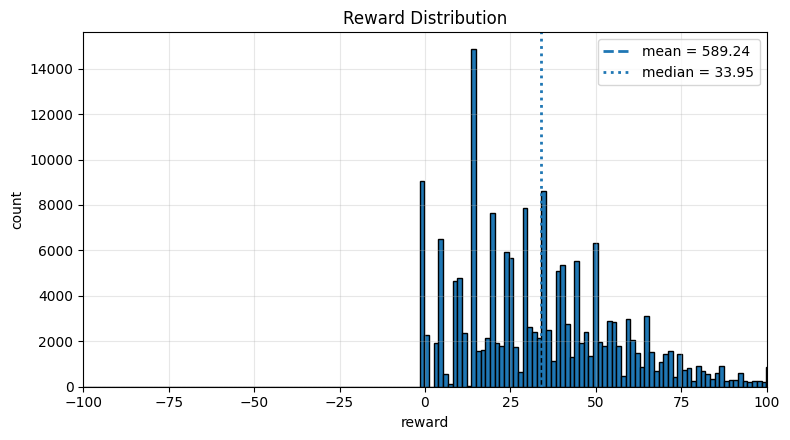

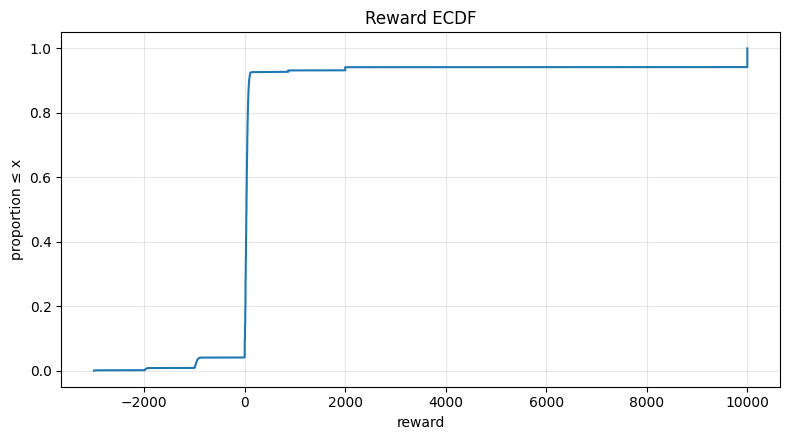

In [8]:
r = df_saved["reward"].astype(float).dropna()

# --- Histogram ---
fig, ax = plt.subplots(figsize=(8,4.5))
bins = np.arange(r.min()-0.5, r.max()+1.5, 1) if np.allclose(r, r.round()) else "auto"
n, bins, _ = ax.hist(r, bins=bins, edgecolor="black")
ax.axvline(r.mean(),   ls="--", lw=2, label=f"mean = {r.mean():.2f}")
ax.axvline(r.median(), ls=":",  lw=2, label=f"median = {r.median():.2f}")
ax.set(title="Reward Distribution", xlabel="reward", ylabel="count")
ax.grid(True, alpha=0.3)
ax.legend()
plt.xlim(-100, 100)
fig.tight_layout()

r_sorted = np.sort(r.values)
y = np.arange(1, len(r_sorted)+1) / len(r_sorted)
plt.figure(figsize=(8,4.5))
plt.plot(r_sorted, y)
plt.title("Reward ECDF")
plt.xlabel("reward")
plt.ylabel("proportion ≤ x")
plt.grid(True, alpha=0.3)
plt.tight_layout()
